# ProblemSet 2 Relatividad (Parte numérica)

Sebastian Yepes Acevedo



## TEM. **Transformación general del tensor de Faraday [Numérico]**

Para demostrar la relación entre los campos eléctrico y magnético transformados, comenzaremos realizando una transformación general al tensor de Faraday usando la matriz $\Lambda$ generalizada, realizando lo siguiente:

$$F'_{\mu\nu} = \Lambda F_{\mu \nu}\Lambda^T$$

In [ ]:
import sympy as sp

ux, uy, uz = sp.symbols("u_x u_y u_z")

Exp, Eyp, Ezp = sp.symbols("E'_x E'_y E'_z")
Bxp, Byp, Bzp = sp.symbols("B'_x B'_y B'_z")

gamma = sp.symbols("gamma")

Fp = sp.Matrix([
    [0,   Exp, Eyp, Ezp],
    [-Exp, 0,   -Bzp, Byp],
    [-Eyp, Bzp,  0,  -Bxp],
    [-Ezp, -Byp, Bxp,  0]
])

u2 = ux**2 + uy**2 + uz**2
velComp = [ux, uy, uz]

Lambda = sp.MutableMatrix(sp.zeros(4))

Lambda[0, 0] = gamma

for i in range(3):
    Lambda[0, i+1] = -gamma * velComp[i]
    Lambda[i+1, 0] = -gamma * velComp[i]

for i in range(3):
    for j in range(3):
        delta_ij = 1 if i == j else 0
        Lambda[i+1, j+1] = delta_ij + (gamma - 1) * velComp[i] * velComp[j] / u2


Lambda = sp.Matrix(Lambda)

display(Lambda)

Matrix([
[     gamma,                                        -gamma*u_x,                                        -gamma*u_y,                                        -gamma*u_z],
[-gamma*u_x, u_x**2*(gamma - 1)/(u_x**2 + u_y**2 + u_z**2) + 1,    u_x*u_y*(gamma - 1)/(u_x**2 + u_y**2 + u_z**2),    u_x*u_z*(gamma - 1)/(u_x**2 + u_y**2 + u_z**2)],
[-gamma*u_y,    u_x*u_y*(gamma - 1)/(u_x**2 + u_y**2 + u_z**2), u_y**2*(gamma - 1)/(u_x**2 + u_y**2 + u_z**2) + 1,    u_y*u_z*(gamma - 1)/(u_x**2 + u_y**2 + u_z**2)],
[-gamma*u_z,    u_x*u_z*(gamma - 1)/(u_x**2 + u_y**2 + u_z**2),    u_y*u_z*(gamma - 1)/(u_x**2 + u_y**2 + u_z**2), u_z**2*(gamma - 1)/(u_x**2 + u_y**2 + u_z**2) + 1]])

In [ ]:
FT = Lambda * Fp * Lambda.T

FTs = sp.simplify(FT.subs(u2, 1 - 1/gamma**2))

display(FTs)

Matrix([
[                                                                                                                                                           0,                                              gamma*(B'_y*gamma*u_z + B'_y*u_z - B'_z*gamma*u_y - B'_z*u_y - E'_x*gamma*u_x**2 + E'_x*gamma + E'_x - E'_y*gamma*u_x*u_y - E'_z*gamma*u_x*u_z)/(gamma + 1),                                            gamma*(-B'_x*gamma*u_z - B'_x*u_z + B'_z*gamma*u_x + B'_z*u_x - E'_x*gamma*u_x*u_y - E'_y*gamma*u_y**2 + E'_y*gamma + E'_y - E'_z*gamma*u_y*u_z)/(gamma + 1),                                              gamma*(B'_x*gamma*u_y + B'_x*u_y - B'_y*gamma*u_x - B'_y*u_x - E'_x*gamma*u_x*u_z - E'_y*gamma*u_y*u_z - E'_z*gamma*u_z**2 + E'_z*gamma + E'_z)/(gamma + 1)],
[gamma*(-B'_y*gamma*u_z - B'_y*u_z + B'_z*gamma*u_y + B'_z*u_y + E'_x*gamma*u_x**2 - E'_x*gamma - E'_x + E'_y*gamma*u_x*u_y + E'_z*gamma*u_x*u_z)/(gamma + 1),                                                                    

Al obtener la matriz del tensor transformado, se extraen los campos ahora transformados

In [ ]:
#Extraemos los componentes
Ex = FTs[0, 1]
Ey = FTs[0, 2]
Ez = FTs[0, 3]

Bx = FTs[3, 2]
By = FTs[1, 3]
Bz = FTs[2, 1]

Ahora, a partir de la formula proporcionada \begin{aligned}
  & \vec{E}=\vec{E}^{\prime}+(\gamma-1) \vec{E}_{\perp}^{\prime}-\gamma \vec{u}_L \times \vec{B}’ \\
  & \vec{B}=\vec{B}^{\prime}+(\gamma-1) \vec{B}_{\perp}^{\prime}+\gamma \vec{u}_L \times \vec{E}^{\prime}
  \end{aligned}

  Realizaremos cada una de las operadciones y comparando con lo obtenido anteriormente, veremos si coincide el resultado.

  Para ello, tendremos en cuenta que el vector perpendicular se puede escribir como

  $$\vec{A}_{\perp}=\vec{A}-\vec{A}_{||}$$

  donde $\vec{A}_{||} = \left(\frac{\vec{A}\cdot \vec{v}}{|\vec{v}|^2}\right)$

In [ ]:
E = sp.Matrix([Ex, Ey, Ez])
B = sp.Matrix([Bx, By, Bz])

EpVec = sp.Matrix([Exp, Eyp, Ezp])
BpVec = sp.Matrix([Bxp, Byp, Bzp])
uLVec = sp.Matrix([ux, uy, uz])

Ep_dot_uL = EpVec.dot(uLVec)
uLNorm = uLVec.dot(uLVec)

Ep_para = sp.simplify((Ep_dot_uL / uLNorm) * uLVec)
Ep_perp = EpVec - Ep_para

Bp_dot_uL = BpVec.dot(uLVec)
Bp_para = sp.simplify((Bp_dot_uL / uLNorm) * uLVec)
Bp_perp = BpVec - Bp_para

uL_cross_Bp = uLVec.cross(BpVec)
uL_cross_Ep = uLVec.cross(EpVec)

E_vectorial_formula = EpVec + (gamma - 1) * Ep_perp - gamma * uL_cross_Bp
B_vectorial_formula = BpVec + (gamma - 1) * Bp_perp + gamma * uL_cross_Ep

Una vez tenemos la expresión del enunciado, podemos comenzar a simplificar la expresión usando sympy.

In [ ]:
E_Fx = sp.simplify(E_vectorial_formula[0]).subs(u2, 1 - 1/gamma**2)
E_Fy = sp.simplify(E_vectorial_formula[1]).subs(u2, 1 - 1/gamma**2)
E_Fz = sp.simplify(E_vectorial_formula[2]).subs(u2, 1 - 1/gamma**2)

Una vex tenemos las expresioines para los campos de forma simplificada y transformada, procedemos a restar ambas expresiones, lo cuál demostraría que en efecto son iguales, si el resultado es nulo.

In [ ]:
diff_Ex = sp.simplify(Ex - E_Fx)
diff_Ey = sp.simplify(Ey - E_Fy)
diff_Ez = sp.simplify(Ez - E_Fz)

print('la diferencia de E es:')
display(diff_Ex)
display(diff_Ey)
display(diff_Ez)


la diferencia de E es:


0

0

0

Vemos que la transformación del campo eléctrico cumple con la expresión del enunciado al obtener un resultado nulo. Realicemos el mismo proceso para el campo magnético.

In [ ]:
B_Fx = sp.simplify(B_vectorial_formula[0]).subs(u2, 1 - 1/gamma**2)
B_Fy = sp.simplify(B_vectorial_formula[1]).subs(u2, 1 - 1/gamma**2)
B_Fz = sp.simplify(B_vectorial_formula[2]).subs(u2, 1 - 1/gamma**2)

In [ ]:
diff_Bx = sp.simplify(Bx - B_Fx)
diff_By = sp.simplify(By - B_Fy)
diff_Bz = sp.simplify(Bz - B_Fz)
display(diff_Bx)
display(diff_By)
display(diff_Bz)

B'_x*(gamma**2*u_x**2 + gamma**2*u_y**2 + gamma**2*u_z**2 - gamma**2 + 1)/(gamma + 1)

B'_y*(gamma**2*u_x**2 + gamma**2*u_y**2 + gamma**2*u_z**2 - gamma**2 + 1)/(gamma + 1)

B'_z*(gamma**2*u_x**2 + gamma**2*u_y**2 + gamma**2*u_z**2 - gamma**2 + 1)/(gamma + 1)

Notamos que el resultado que arroja sympy para la diferencia de los campos calculados no es nula, pero realmente sí lo es, dado a que simplificamos un poco más la expresión teniendo en cuenta que $$\gamma^2=\frac{1}{1-u^2}$$, veremos que el resultado se hace cero. implementemos este dato con el fin de verificar si estamos en lo correcto

In [ ]:
Bx_diff = diff_Bx.subs(gamma, sp.sqrt(1 / (1 - u2)))
By_diff = diff_By.subs(gamma, sp.sqrt(1 / (1 - u2)))
Bz_diff = diff_Bz.subs(gamma, sp.sqrt(1 / (1 - u2)))
print('la diferencia de B es:')
sp.cancel(Bx_diff),sp.cancel(By_diff),sp.cancel(Bz_diff)



la diferencia de B es:


(0, 0, 0)

Ahora sí logramos obtener el valor nulo en la resta que estabamos esperando, demostrando así que la transformación general del campo magnético puede escribirse usando la expresión del enunciado.

## TED. **Tensor electromagnético dual [Numérico]**.

# 1)

Comenzamos definiendo el tensor de faraday junto con los simbolos necesarios con la ayuda de simpy

In [ ]:
Ex, Ey, Ez = sp.symbols('E_x E_y E_z')
Bx, By, Bz = sp.symbols('B_x B_y B_z')

FCov = sp.Matrix([
    [0,  Ex,  Ey,  Ez],
    [-Ex, 0,  -Bz, By],
    [-Ey, Bz,  0,  -Bx],
    [-Ez, -By, Bx,  0]
])

print("Tensor Electromagnético Covariante F_μν:")
display(FCov)

Tensor Electromagnético Covariante F_μν:


Matrix([
[   0,  E_x,  E_y,  E_z],
[-E_x,    0, -B_z,  B_y],
[-E_y,  B_z,    0, -B_x],
[-E_z, -B_y,  B_x,    0]])

Ahora, se plantea una rutina donde se itera cada componente del tensor para operar el leviCivita y poder realizar la operación:

$$\frac{1}{2} \epsilon^{\mu\nu\alpha\beta}F_{\alpha \beta}$$

In [ ]:
dualFContra = sp.zeros(4)

for mu in range(4):
    for nu in range(4):
        sum = 0
        for alpha in range(4):
            for beta in range(4):
                term = sp.Rational(1, 2) * sp.LeviCivita(mu, nu, alpha, beta) * FCov[alpha, beta]
                sum += term
        dualFContra[mu, nu] = sum

print("\n Tensor Dual Contravariante: ")
display(dualFContra)




 Tensor Dual Contravariante: 


Matrix([
[  0, -B_x, -B_y, -B_z],
[B_x,    0,  E_z, -E_y],
[B_y, -E_z,    0,  E_x],
[B_z,  E_y, -E_x,    0]])

De la misma manera, queremos encontrar el tensor de faraday dual pero en su forma covariante, para ello haremos uso de la métrica de Minkowski para bajar los indices del tensor como:

$$F_{\mu \nu} = \eta_{\mu \alpha} \eta_{\nu \beta} F^{\alpha\beta}$$

In [ ]:
etaCov = sp.Matrix([
    [1, 0, 0, 0],
    [0, -1, 0, 0],
    [0, 0, -1, 0],
    [0, 0, 0, -1]
])

dualFCov = etaCov * dualFContra * etaCov

print("\nTensor Dual Covariante: ")
display(dualFCov)


Tensor Dual Covariante: 


Matrix([
[   0,  B_x,  B_y,  B_z],
[-B_x,    0,  E_z, -E_y],
[-B_y, -E_z,    0,  E_x],
[-B_z,  E_y, -E_x,    0]])

Obtenemos así los tensores de Faraday en base dual tanto covariantes como contravariantes.

# 2)

Ahora, queremos mostrar que se cumple que :  $$
  (\vec E\cdot\vec B) = -\frac{1}{4}{}^{*}F^{\mu\nu}F_{\mu\nu}
  $$

Para ello, realizaremos la operación de la derecha, usando el tensor dual contravariante del punto anterior y el tensor covariante.

El proceso es similar al anterior con el levicita, donde iteraremos entre los indices y realizaremos la multiplicación.

In [ ]:
mult = 0

for mu in range(4):
    for nu in range(4):
                mult += dualFContra[mu, nu] * FCov[mu, nu]

op = sp.simplify(sp.Rational(-1,4) * mult)
display(op)

B_x*E_x + B_y*E_y + B_z*E_z

Notemos que el valor obtenido de la operación, corresponde al producto punto entre los vectores de campo eléctrico y campo magnético, debido a que:

$$\vec{E} \cdot \vec{B} = E_xB_x+E_yB_y+E_zB_z$$

Y como el producto punto es conmutativo, el resultado corresponde al obtenido en el código anterior, demostrando que la ecuación se cumple.

## GE. **Geodésicas en un espacio cerrado**.

# 3)

Partimos de las ecuaciones de la geodésica calculada en la parte escrita del problem set:

$$\ddot x=-\frac{2cot(y/R)}{R}\dot x \dot y$$
$$\ddot y = \frac{sin(y/R)cos(y/R)}{R}\dot x^2$$

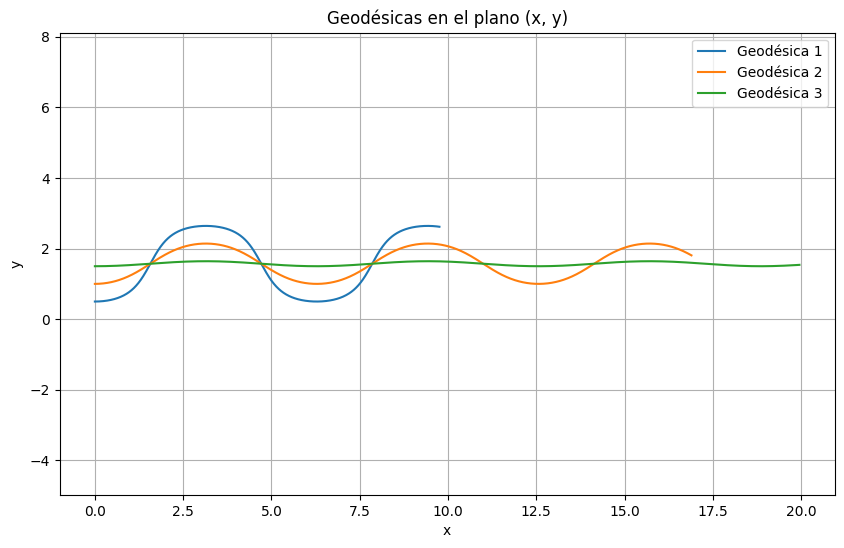

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


R = 1.0  # Radio del espacio

def geodesicEqs(S, tau, R):
    x, y, vx, vy = S

    sin_yR = np.sin(y / R)
    cos_yR = np.cos(y / R)

    # evitar problemas para el cotangente
    if abs(sin_yR) < 1e-9:
        ax = 0.0
    else:
        ax = -2.0/R * (cos_yR / sin_yR) * vx * vy

    ay = (1.0/R) * sin_yR * cos_yR * vx**2

    return [vx, vy, ax, ay]

t = np.linspace(0, 20, 1000)

#Condiciones iniciales

S0_1 = [0.0, 0.5, 1.0, 0.0]
sol1 = odeint(geodesicEqs, S0_1, t, args=(R,))

S0_2 = [0.0, 1.0, 1.0, 0.0]
sol2 = odeint(geodesicEqs, S0_2, t, args=(R,))

S0_3 = [0.0, 1.5, 1.0, 0.0]
sol3 = odeint(geodesicEqs, S0_3, t, args=(R,))

plt.figure(figsize=(10, 6))
plt.plot(sol1[:, 0], sol1[:, 1], label='Geodésica 1')
plt.plot(sol2[:, 0], sol2[:, 1], label='Geodésica 2')
plt.plot(sol3[:, 0], sol3[:, 1], label='Geodésica 3')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Geodésicas en el plano (x, y)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


Podemos observar que las soluciones de las geodésicas no son planas, en este caso son curveadas. Este resultado nos puede indicar que hay una curvatura inducida por la métrica, dandonos un indicio de que la métrica que se maneja, posiblemente sea la de una esfera.

# 4)

Una vez demostramos en la parte escrita que la métrica que usamos es en efecto identica a la de una esféra, podemos repetir el calculo, pero como si fuese la superficie de la tierra.

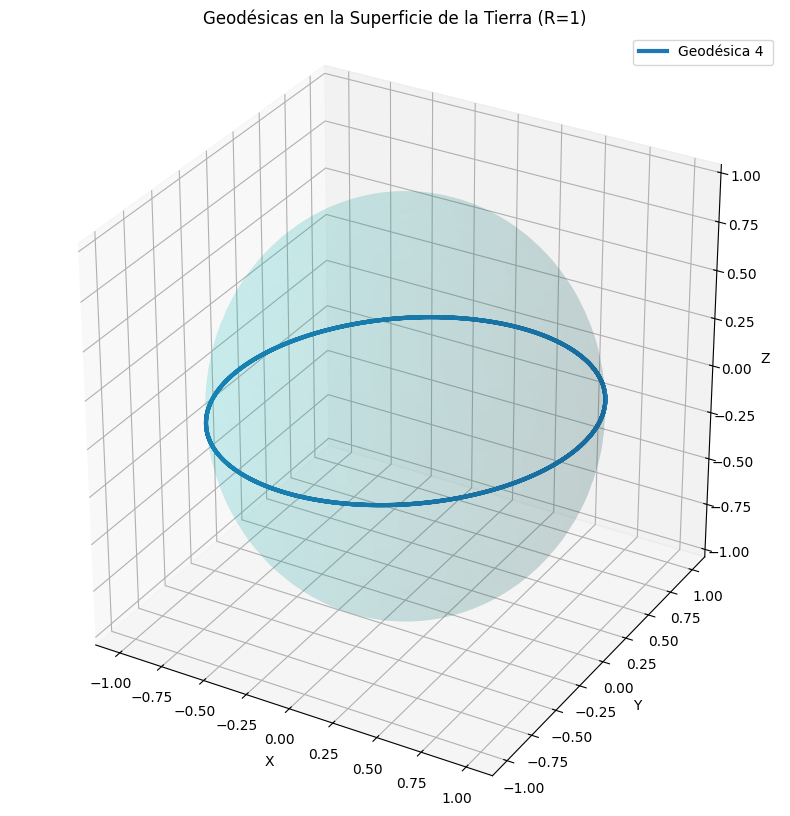

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

t = np.linspace(0, 20, 1000)

angle = np.pi / 4
S0_4 = [0.0, 0.0, np.cos(angle), np.sin(angle)]
sol4 = odeint(geodesicEqs, S0_3, t, args=(R,))
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

def convert_to_cartesian(x_c, y_c, R):
    theta = y_c / R
    phi = x_c / R

    X = R * np.sin(theta) * np.cos(phi)
    Y = R * np.sin(theta) * np.sin(phi)
    Z = R * np.cos(theta)
    return X, Y, Z

u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = R * np.outer(np.cos(u), np.sin(v))
y_sphere = R * np.outer(np.sin(u), np.sin(v))
z_sphere = R * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='c', alpha=0.1, linewidth=0)


X, Y, Z = convert_to_cartesian(sol4[:, 0], sol4[:, 1], R)
ax.plot(X, Y, Z, label='Geodésica 4 ', lw=3)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Geodésicas en la Superficie de la Tierra (R=1)')
ax.legend()
ax.set_box_aspect([1,1,1])
plt.show()

Notemos que se obtuvo una circunferencia máxima, pasando por el centro de la esfera, pero algo inclinada. Si se quisiera entonces, con esta métrica se podría trazar los meridianos o el ecuador del planeta Tierra.

# Referencias:

-Texto guía: Jorge I. Zuluaga, *Relatividad y Gravitación: Teoría, algoritmos y problemas*.

-Se utilizó a Gemini como ayuda con estética y algunos planteamientos en los códigos y problemas resueltos en la parte escrita.